In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure, metrics
from skimage.filters import frangi, gabor
from skimage.color import rgb2gray
from skimage.restoration import denoise_bilateral
from scipy.ndimage import gaussian_filter
from skimage.util import random_noise
from skimage.filters.rank import median
from skimage.morphology import disk
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

In [2]:
# Helper function to plot images
def plot_images(titles, images):
    fig, axs = plt.subplots(1, len(images), figsize=(15, 15))
    for i, ax in enumerate(axs):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')
    plt.show()


In [5]:
IMAGE_PATH=r"C:\Users\thooy\Downloads\Evaluation_Set\1.png"

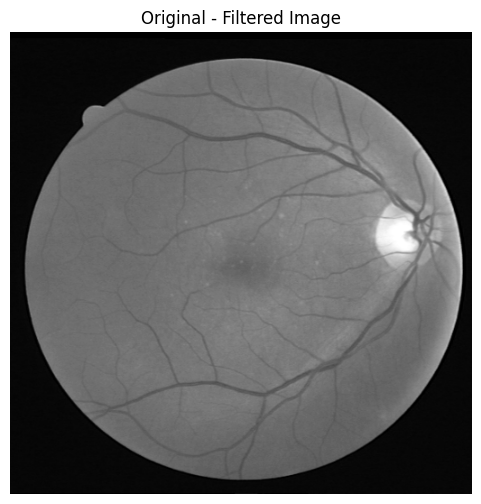

c:\Users\thooy\anaconda3\envs\edge\lib\site-packages\skimage\metrics\simple_metrics.py:168: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range**2) / err)


Original -> PSNR: inf, SSIM: 1.0000


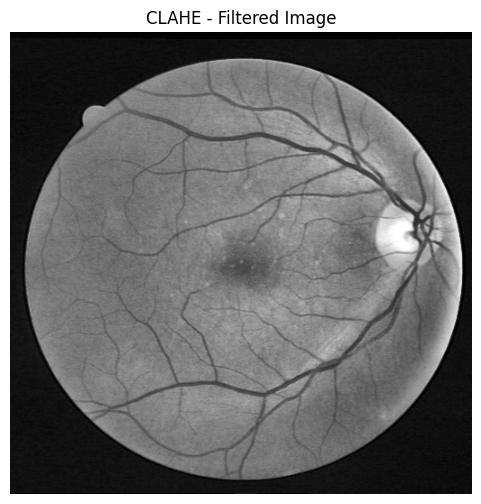

CLAHE -> PSNR: 25.03, SSIM: 0.7958


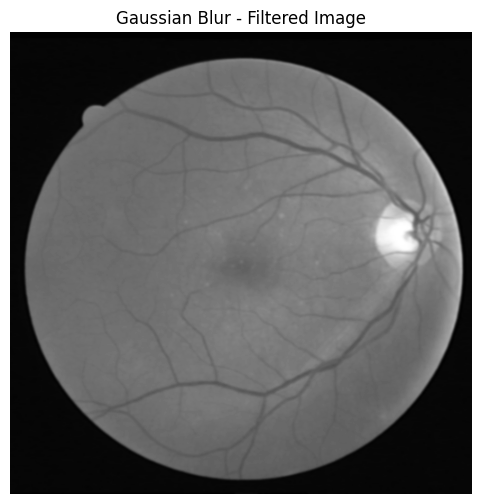

Gaussian Blur -> PSNR: 38.12, SSIM: 0.9653


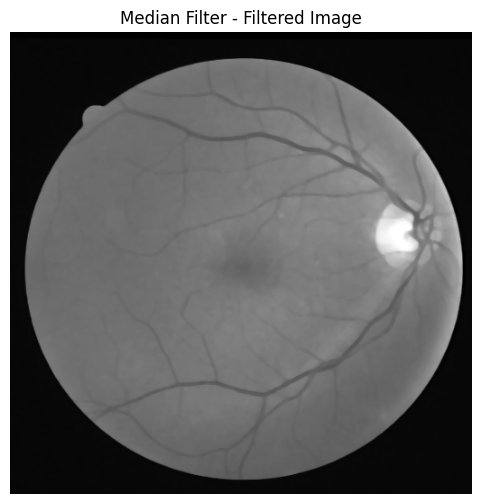

Median Filter -> PSNR: 40.13, SSIM: 0.9533


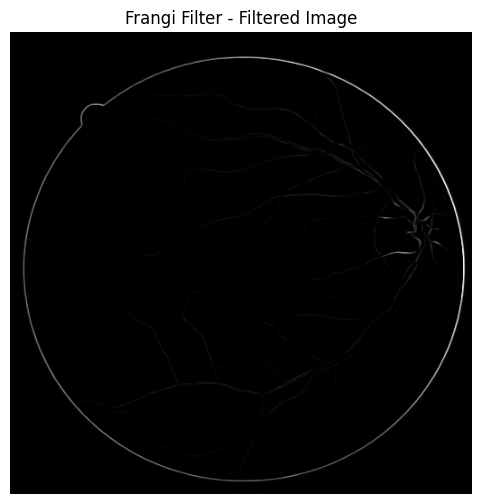

Frangi Filter -> PSNR: 8.24, SSIM: 0.0012


C:\Users\thooy\AppData\Local\Temp\ipykernel_95024\3940908312.py:35: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_value = psnr(original, filtered)


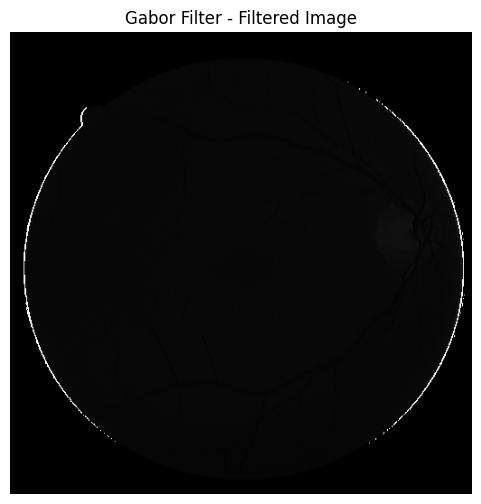

Gabor Filter -> PSNR: 8.64, SSIM: 0.0992


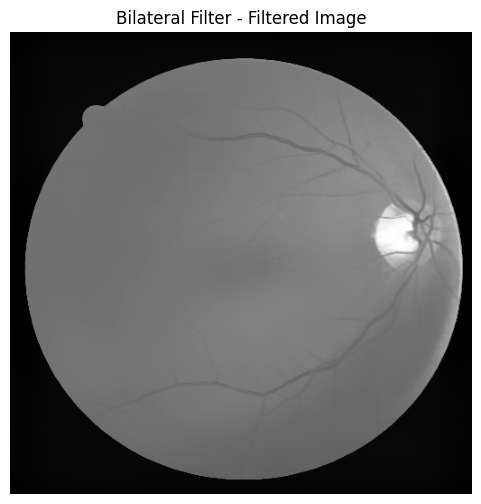

Bilateral Filter -> PSNR: 8.27, SSIM: 0.0006


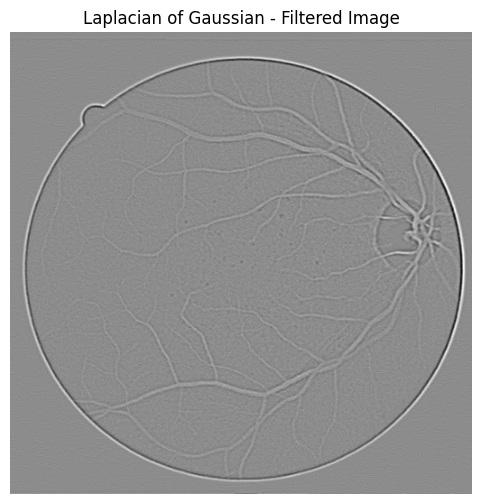

Laplacian of Gaussian -> PSNR: 8.20, SSIM: 0.0017


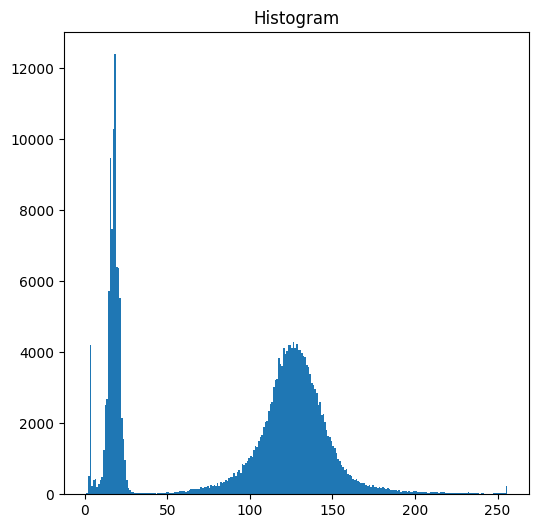

In [6]:



# Load image
image = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Extract Green Channel
green_channel = image_rgb[:, :, 1]

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_green = clahe.apply(green_channel)

# Apply Gaussian Filter
gaussian_blur = gaussian_filter(green_channel, sigma=1)

# Apply Median Filter
median_filtered = median(green_channel, disk(3))

# Apply Matched Filter using Frangi
frangi_image = frangi(green_channel)

# Apply Gabor Filter
gabor_image, _ = gabor(green_channel, frequency=0.6)

# Apply Bilateral Filter (denoising)
bilateral_filtered = denoise_bilateral(green_channel, sigma_color=0.05, sigma_spatial=15)

# Apply Laplacian of Gaussian (LoG)
log_image = cv2.Laplacian(gaussian_blur, cv2.CV_64F)

# Add Noise and test PSNR, SNR
noisy_image = random_noise(green_channel, mode='s&p', amount=0.05)

# Calculate PSNR and SSIM for all filtered images
def calculate_metrics(original, filtered):
    psnr_value = psnr(original, filtered)
    ssim_value = ssim(original, filtered, data_range=filtered.max() - filtered.min())
    return psnr_value, ssim_value

# Plot original vs filtered
filters = {
    'Original': green_channel,
    'CLAHE': clahe_green,
    'Gaussian Blur': gaussian_blur,
    'Median Filter': median_filtered,
    'Frangi Filter': frangi_image,
    'Gabor Filter': gabor_image,
    'Bilateral Filter': bilateral_filtered,
    'Laplacian of Gaussian': log_image
}

# Plot and calculate metrics
for name, filtered_image in filters.items():
    plt.figure(figsize=(6,6))
    plt.title(f'{name} - Filtered Image')
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')
    plt.show()

    # Calculate PSNR and SSIM
    psnr_val, ssim_val = calculate_metrics(green_channel, filtered_image)
    print(f"{name} -> PSNR: {psnr_val:.2f}, SSIM: {ssim_val:.4f}")

# SNR Calculation
def signal_to_noise_ratio(image, noisy_image):
    noise = noisy_image - image
    snr = np.mean(image) / np.std(noise)
    return snr

# Histogram Visualization
def plot_histogram(image):
    plt.figure(figsize=(6,6))
    plt.hist(image.ravel(), bins=256, range=(0, 256))
    plt.title('Histogram')
    plt.show()

# Example: CLAHE image histogram
plot_histogram(clahe_green)


In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Extract Green Channel
green_channel = image_rgb[:, :, 1]

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_green = clahe.apply(green_channel)

# Apply Gaussian Filter
gaussian_blur = gaussian_filter(green_channel, sigma=1)

# Apply Median Filter
median_filtered = median(green_channel, disk(3))

# Apply Matched Filter using Frangi
frangi_image = frangi(green_channel)

# Apply Gabor Filter
gabor_image, _ = gabor(green_channel, frequency=0.6)

# Apply Bilateral Filter (denoising)
bilateral_filtered = denoise_bilateral(green_channel, sigma_color=0.05, sigma_spatial=15)

# Apply Laplacian of Gaussian (LoG)
log_image = cv2.Laplacian(gaussian_blur, cv2.CV_64F)

# Add Noise and test PSNR, SNR
noisy_image = random_noise(green_channel, mode='s&p', amount=0.05)

# Calculate PSNR and SSIM for all filtered images
def calculate_metrics(original, filtered):
    psnr_value = psnr(original, filtered)
    ssim_value = ssim(original, filtered, data_range=filtered.max() - filtered.min())
    return psnr_value, ssim_value

# Plot original vs filtered
filters = {
    'Original': green_channel,
    'CLAHE': clahe_green,
    'Gaussian Blur': gaussian_blur,
    'Median Filter': median_filtered,
    'Frangi Filter': frangi_image,
    'Gabor Filter': gabor_image,
    'Bilateral Filter': bilateral_filtered,
    'Laplacian of Gaussian': log_image
}

# Plot and calculate metrics
for name, filtered_image in filters.items():
    plt.figure(figsize=(6,6))
    plt.title(f'{name} - Filtered Image')
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')
    plt.show()

    # Calculate PSNR and SSIM
    psnr_val, ssim_val = calculate_metrics(green_channel, filtered_image)
    print(f"{name} -> PSNR: {psnr_val:.2f}, SSIM: {ssim_val:.4f}")

# SNR Calculation
def signal_to_noise_ratio(image, noisy_image):
    noise = noisy_image - image
    snr = np.mean(image) / np.std(noise)
    return snr

# Histogram Visualization
def plot_histogram(image):
    plt.figure(figsize=(6,6))
    plt.hist(image.ravel(), bins=256, range=(0, 256))
    plt.title('Histogram')
    plt.show()

# Example: CLAHE image histogram
plot_histogram(clahe_green)


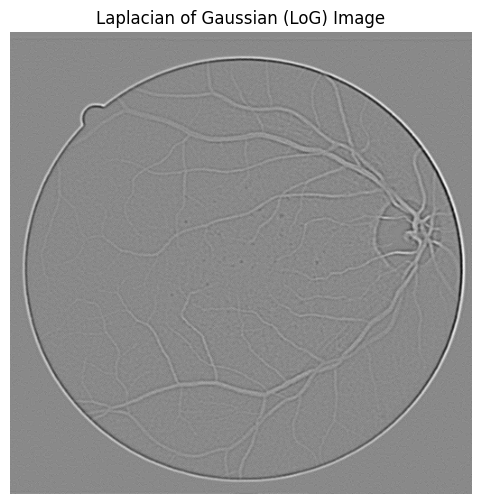

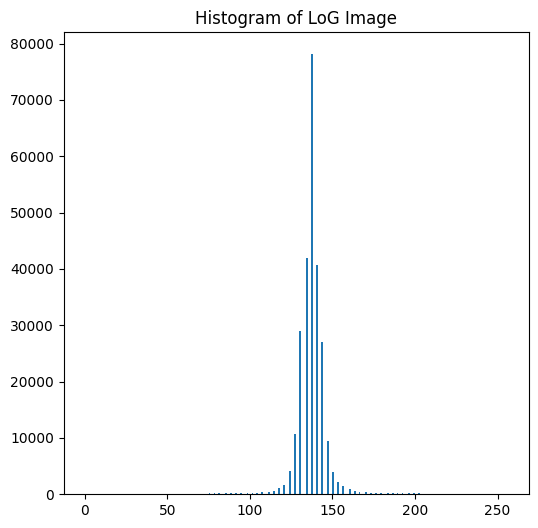

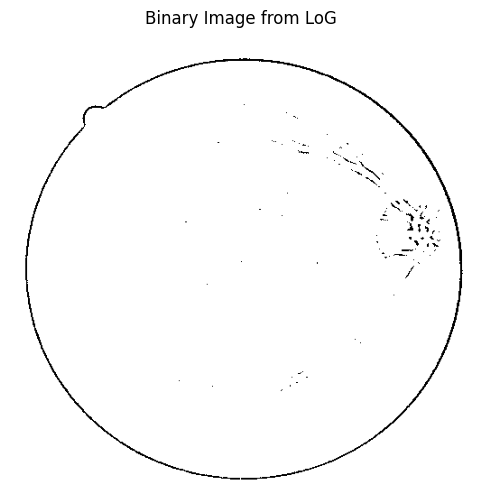

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters

# Load image
image = cv2.imread(r"C:\Users\thooy\Downloads\Evaluation_Set\1.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Extract Green Channel
green_channel = image_rgb[:, :, 1]

# Apply Gaussian Blur to reduce noise before LoG
gaussian_blur = cv2.GaussianBlur(green_channel, (5, 5), 0)

# Apply Laplacian of Gaussian (LoG)
log_image = cv2.Laplacian(gaussian_blur, cv2.CV_64F)

# Normalize the LoG image to be in range [0, 255]
log_image = np.uint8(255 * (log_image - np.min(log_image)) / (np.max(log_image) - np.min(log_image)))

# Plot the LoG image
plt.figure(figsize=(6,6))
plt.title('Laplacian of Gaussian (LoG) Image')
plt.imshow(log_image, cmap='gray')
plt.axis('off')
plt.show()

# Plot histogram of the LoG image
def plot_histogram(image):
    plt.figure(figsize=(6,6))
    plt.hist(image.ravel(), bins=256, range=(0, 256))
    plt.title('Histogram of LoG Image')
    plt.show()

# Plot the histogram
plot_histogram(log_image)

# Convert LoG image to binary using Otsu's thresholding
_, binary_image = cv2.threshold(log_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Plot the binary image
plt.figure(figsize=(6,6))
plt.title('Binary Image from LoG')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()


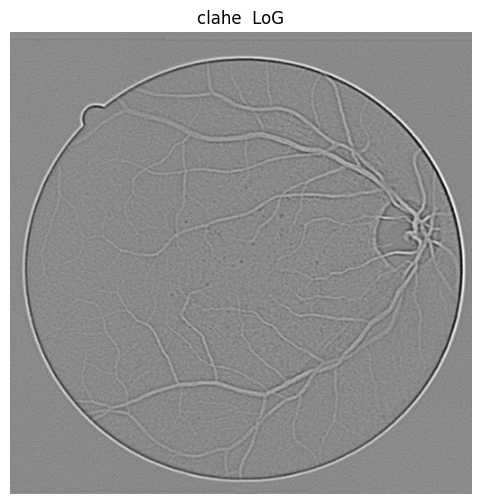

In [17]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
log_clahe=clahe.apply(log_image)
plt.figure(figsize=(6,6))
plt.title('clahe  LoG')
plt.imshow(log_clahe, cmap='gray')
plt.axis('off')
plt.show()


In [19]:
def matched_filter(image, kernel_sizes=[9, 15, 21], sigma=2, num_angles=24):
    filtered_images = []
    for kernel_size in kernel_sizes:
        for angle in range(num_angles):
            # Create a line filter at different angles
            theta = np.deg2rad(angle * 180 / num_angles)
            kernel = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
            filtered_image = cv2.filter2D(image, cv2.CV_32F, kernel)
            filtered_images.append(filtered_image)
    
    # Take the maximum response across all angles and kernel sizes
    return np.max(np.array(filtered_images), axis=0)

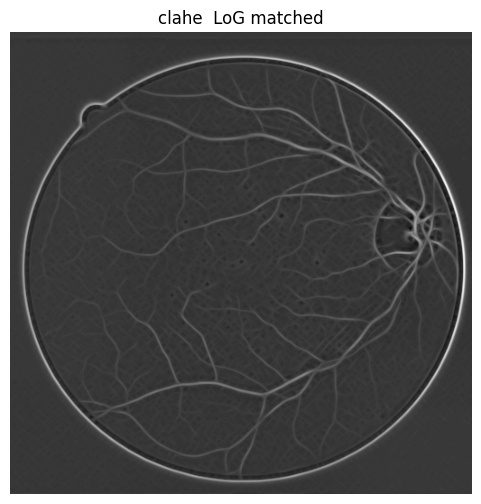

In [22]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
log_clahe_matched=matched_filter(log_clahe)
plt.figure(figsize=(6,6))
plt.title('clahe  LoG matched')
plt.imshow(log_clahe_matched, cmap='gray')
plt.axis('off')
plt.show()


In [26]:
print(log_clahe_matched.dtype)
print(log_clahe_matched.shape)
if len(log_clahe_matched.shape) == 3:
    log_clahe_matched = cv2.cvtColor(log_clahe_matched, cv2.COLOR_BGR2GRAY)
if log_clahe_matched.dtype != np.uint8:
    log_clahe_matched = cv2.normalize(log_clahe_matched, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)



float32
(512, 512)


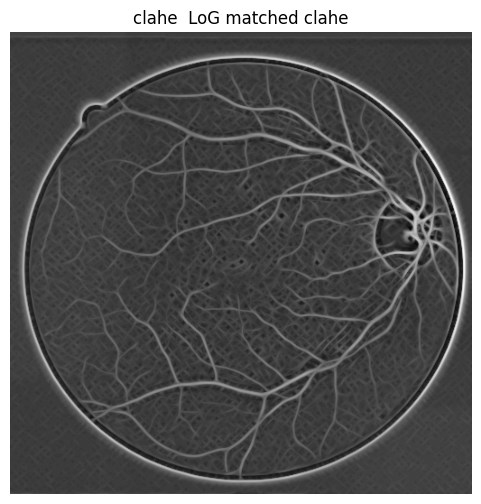

In [27]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
log_clahe_matched_clahe=clahe.apply(log_clahe_matched)
plt.figure(figsize=(6,6))
plt.title('clahe  LoG matched clahe')
plt.imshow(log_clahe_matched_clahe, cmap='gray')
plt.axis('off')
plt.show()

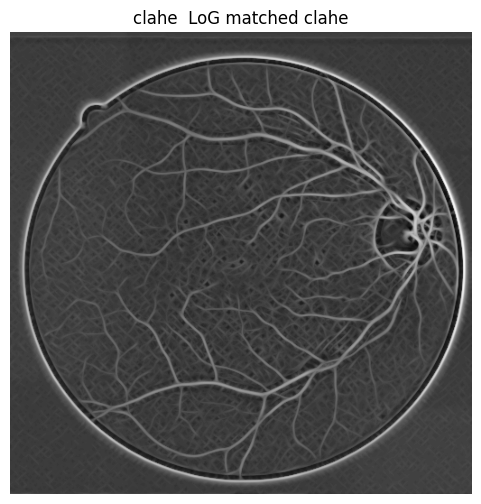

In [29]:
matched_filtered_image = cv2.normalize(log_clahe_matched_clahe, None, 0, 255, cv2.NORM_MINMAX)
plt.figure(figsize=(6,6))
plt.title('clahe  LoG matched clahe')
plt.imshow(matched_filtered_image, cmap='gray')
plt.axis('off')
plt.show()

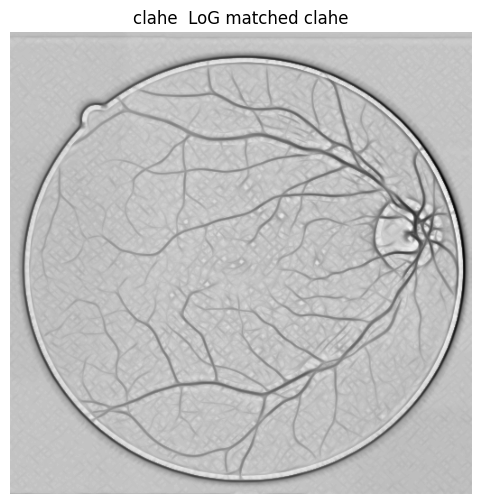

In [49]:
vessels_inverted = cv2.bitwise_not(log_clahe_matched_clahe)


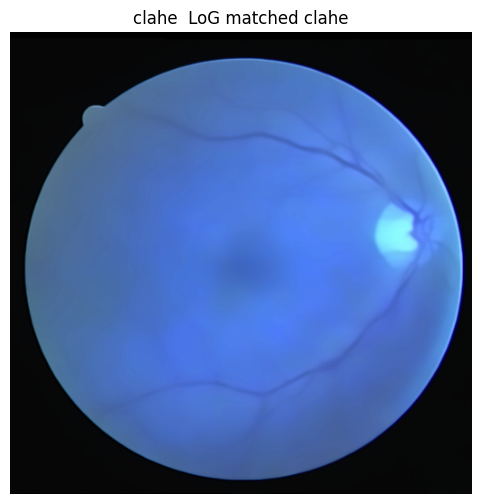

In [57]:
plt.figure(figsize=(6,6))
plt.title('clahe  LoG matched clahe')
plt.imshow(vessels_inverted, cmap='gray')
plt.axis('off')
plt.show()

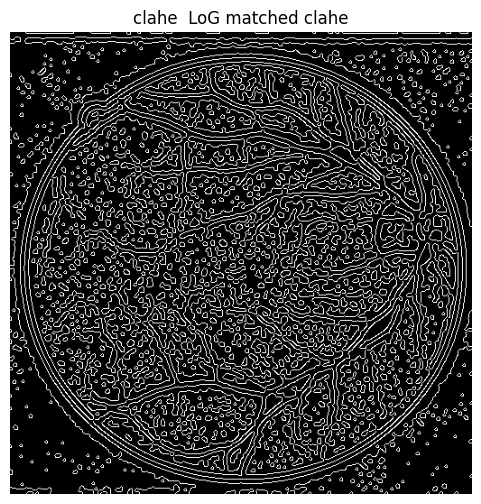

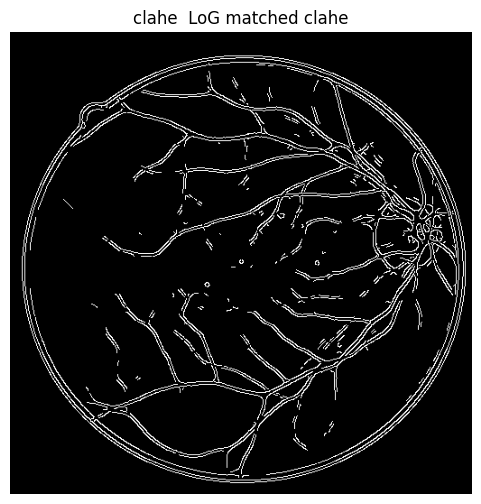

In [50]:
vessels_segmented = cv2.adaptiveThreshold(
    matched_filtered_image.astype(np.uint8), 
    255, 
    cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY, 
    11, 
    2
)

# Morphological operations to clean up the segmentation
kernel = np.ones((3, 3), np.uint8)
vessels_cleaned = cv2.morphologyEx(vessels_segmented, cv2.MORPH_CLOSE, kernel)
vessels_cleaned = cv2.morphologyEx(vessels_cleaned, cv2.MORPH_OPEN, kernel)
edges = cv2.Canny(vessels_cleaned, 150, 200)
plt.figure(figsize=(6,6))
plt.title('clahe  LoG matched clahe')
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()


edges_canny=cv2.Canny(vessels_inverted,150,200)
plt.figure(figsize=(6,6))
plt.title('clahe  LoG matched clahe')
plt.imshow(edges_canny, cmap='gray')
plt.axis('off')
plt.show()

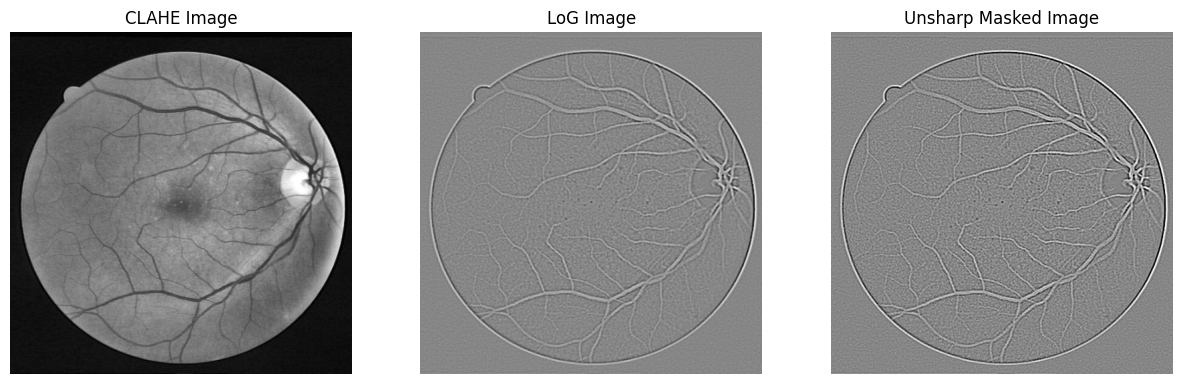

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread(r"C:\Users\thooy\Downloads\Evaluation_Set\1.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Extract Green Channel
green_channel = image_rgb[:, :, 1]

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(green_channel)

# Apply Gaussian Blur to reduce noise before LoG
gaussian_blur = cv2.GaussianBlur(clahe_image, (5, 5), 0)

# Apply Laplacian of Gaussian (LoG)
log_image = cv2.Laplacian(gaussian_blur, cv2.CV_64F)

# Normalize the LoG image to be in range [0, 255]
log_image_normalized = np.uint8(255 * (log_image - np.min(log_image)) / (np.max(log_image) - np.min(log_image)))

# Unsharp Masking
def unsharp_mask(image, sigma=1.0, strength=1.5):
    # Gaussian blur
    blurred = cv2.GaussianBlur(image, (5, 5), sigma)
    # Unsharp mask
    sharpened = cv2.addWeighted(image, 1 + strength, blurred, -strength, 0)
    return sharpened

# Apply Unsharp Masking to the LoG image
unsharp_image = unsharp_mask(log_image_normalized)

# Plot the images
def plot_images(titles, images):
    fig, axs = plt.subplots(1, len(images), figsize=(15, 15))
    for i, ax in enumerate(axs):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')
    plt.show()

# Visualize CLAHE, LoG, and Unsharp Masked Images
plot_images(['CLAHE Image', 'LoG Image', 'Unsharp Masked Image'],
            [clahe_image, log_image_normalized, unsharp_image])


In [59]:
if len(vessels_inverted.shape) == 3:
    vessels_inverted = cv2.cvtColor(vessels_inverted, cv2.COLOR_BGR2GRAY)
if vessels_inverted.dtype != np.uint8:
    vessels_inverted = cv2.normalize(vessels_inverted, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
vessels_inverted = cv2.medianBlur(vessels_inverted, ksize=5)




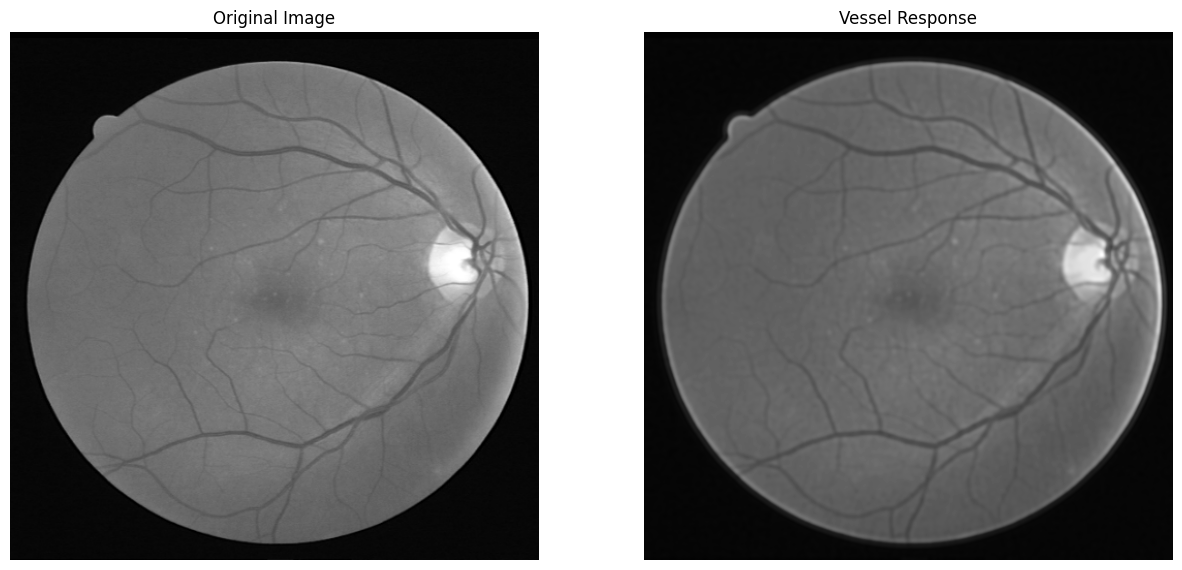

In [61]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def create_gabor_kernel(theta, lambd, sigma, gamma):
    """
    Create a Gabor kernel.
    
    Parameters:
        theta (float): Orientation of the normal to the parallel stripes of a Gabor function.
        lambd (float): Wavelength of the sinusoidal factor.
        sigma (float): Standard deviation of the Gaussian envelope.
        gamma (float): Spatial aspect ratio.
        
    Returns:
        np.ndarray: The Gabor kernel.
    """
    # Calculate kernel size
    ksize = 21  # Size of the kernel
    half_size = ksize // 2
    
    # Create the kernel grid
    y, x = np.mgrid[-half_size:half_size + 1, -half_size:half_size + 1]
    
    # Rotation
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)
    
    # Gabor function
    gb = np.exp(-0.5 * (x_theta**2 + (gamma**2) * (y_theta**2)) / (sigma**2)) * \
                np.cos(2 * np.pi * x_theta / lambd)
    
    return gb

def multi_kernel_vessel_extraction(image, angles, thicknesses):
    """
    Apply multiple Gabor-like kernels for vessel extraction.
    
    Parameters:
        image (np.ndarray): Input image.
        angles (list): List of angles in radians.
        thicknesses (list): List of thickness values (sigma).
        
    Returns:
        np.ndarray: Combined response of all kernels.
    """
    combined_response = np.zeros_like(image, dtype=np.float32)
    
    for theta in angles:
        for thickness in thicknesses:
            # Create Gabor kernel for current angle and thickness
            kernel = create_gabor_kernel(theta, lambd=10, sigma=thickness, gamma=1)
            # Convolve the image with the kernel
            response = cv2.filter2D(image, cv2.CV_32F, kernel)
            # Accumulate the response
            combined_response += np.abs(response)
    
    return combined_response

# Load image
image = cv2.imread(r"C:\Users\thooy\Downloads\Evaluation_Set\1.png")
image=image[: ,:,1]

# Normalize image

# Define angles and thicknesses
angles = np.linspace(0, np.pi, 8)  # 8 angles from 0 to 180 degrees
thicknesses = [1, 2, 3, 4]  # Different thicknesses for vessels

# Apply multi-kernel vessel extraction
vessel_response = multi_kernel_vessel_extraction(image, angles, thicknesses)

# Plot original and vessel response images
def plot_images(titles, images):
    fig, axs = plt.subplots(1, len(images), figsize=(15, 15))
    for i, ax in enumerate(axs):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')
    plt.show()

# Visualize the results
plot_images(['Original Image', 'Vessel Response'],
            [image, vessel_response])
